### _PCA Reduction and 3D plotting of MEG data using MNE-Python sample data_

319 events found
Events id: [ 1  2  3  4  5 32]


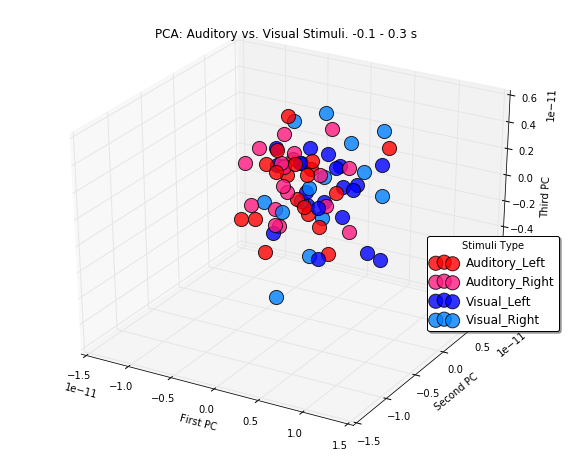

In [1]:
# run PCA on MEG data
# Author: Laura Gwilliams (NYU)
# Email: leg5@nyu.edu
# Dependencies: scikitlearn, matplotlib, MNE-Python
# Version: 2- 08/05/16

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import mne
import numpy as np


# set up file directories to example MNE-Python data
data_path = mne.datasets.sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'

# determine size of epochs
tmin, tmax = -0.1, 0.3
event_id = dict(aud_l=1,aud_r=2,vis_l=3,vis_r=4) # trigger correspondance

# load data and make epochs
raw = mne.io.Raw(raw_fname, preload=True, verbose=False)
events = mne.find_events(raw)

reject = dict(grad=4000e-13, # T / m (gradiometers)
              mag=4e-12, # T (magnetometers)
              eeg=40e-6, # V (EEG channels)
              eog=250e-6) # V (EOG channels))

epochs = mne.Epochs(raw=raw, events=events, event_id=event_id, tmin=tmin,
                    tmax=tmax, preload=True, baseline=(0,None), reject=reject,
                    verbose=False)

# pull out just data channels
epochs.pick_types(stim=False)

# pull out the data, average over time, and get data labels
X = np.mean(epochs._data,2)
y = epochs.events[:,2]

# fit and apply the PCA
pca = PCA(n_components=3)
X_r = pca.fit(X).transform(X)

#-# plot 3D #-#

# set up dictionaries for plotting colour and legend labels
colour_dict_mod = {'1':[1,0,0],'2':[1,0.1,0.5],'3':[0,0,1],'4':[0,0.5,1]}
leg_dict_mod = {'1':'Auditory_Left','2':'Auditory_Right','3':'Visual_Left','4':'Visual_Right'}

# init figure
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# reorganise the plots
idxs = np.argsort(y)
y = y[idxs]
X_r = X_r[idxs,:]

# loop through each epoch and plot on 3D scatter
plotted_ys = []

for label_idx in xrange(0,len(y)):
    ax.scatter(X_r[label_idx,0],X_r[label_idx,1],X_r[label_idx,2], marker='o',
               c=colour_dict_mod.get(str(y[label_idx])), s=200, alpha=0.8,
               label=leg_dict_mod.get(str(y[label_idx])) if y[label_idx] not in plotted_ys else "_nolegend_")
    plotted_ys.append(y[label_idx])

# add legend and show
plt.legend(title='%s' % 'Stimuli Type', loc='upper right', bbox_to_anchor=(1, 0.5),
          fancybox=True, shadow=True)
plt.title('PCA: Auditory vs. Visual Stimuli. %s - %s s' % (str(tmin), str(tmax)))
ax.set_xlabel('First PC'), ax.set_ylabel('Second PC'), ax.set_zlabel('Third PC')

plt.show()